<a href="https://colab.research.google.com/github/Marciorochar/Analise-Preditiva/blob/main/Suaviza%C3%A7%C3%A3o_Exponencial_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


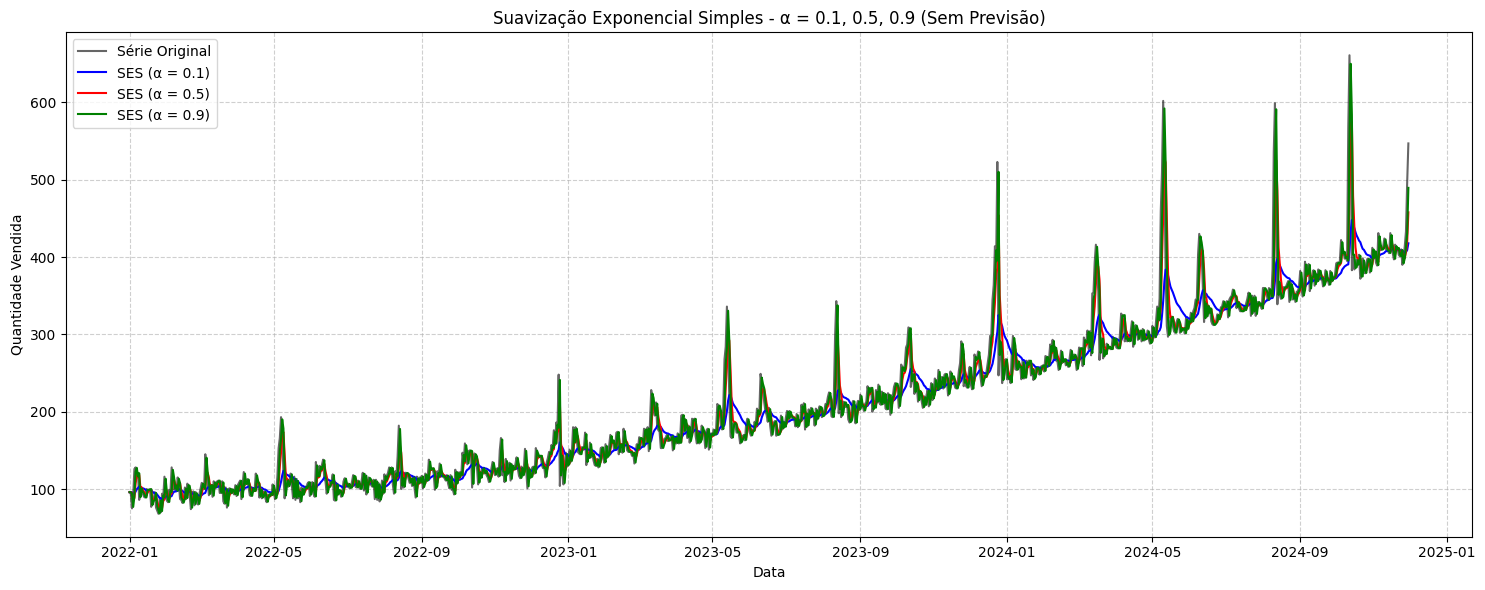

In [4]:
# 📦 Instalar e importar bibliotecas
!pip install openpyxl
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 📁 Carregar o arquivo corretamente
df = pd.read_excel('/content/Dados_29-04-25.xlsx')

## 📦 Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# 🧹 Preparar os dados (assumindo df já carregado e tratado)
df.columns = ['Data', 'Dia_da_Semana', 'Vendas']
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)
df = df[['Data', 'Vendas']].sort_values('Data')
df = df.set_index('Data')

# ✅ Suavização exponencial simples com diferentes alphas (sem previsão)
model_03 = SimpleExpSmoothing(df['Vendas']).fit(smoothing_level=0.1, optimized=False)
model_05 = SimpleExpSmoothing(df['Vendas']).fit(smoothing_level=0.5, optimized=False)
model_09 = SimpleExpSmoothing(df['Vendas']).fit(smoothing_level=0.9, optimized=False)

df['SES_01'] = model_03.fittedvalues
df['SES_05'] = model_05.fittedvalues
df['SES_09'] = model_09.fittedvalues

# 🎨 Gráfico
plt.figure(figsize=(15, 6))
plt.plot(df['Vendas'], label='Série Original', color='black', alpha=0.6)
plt.plot(df['SES_01'], label='SES (α = 0.1)', color='blue')
plt.plot(df['SES_05'], label='SES (α = 0.5)', color='red')
plt.plot(df['SES_09'], label='SES (α = 0.9)', color='green')

plt.title('Suavização Exponencial Simples - α = 0.1, 0.5, 0.9 (Sem Previsão)')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
